In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

In [5]:
df = pd.read_csv("C:\\Users\\Dell\\Downloads\\archive (5)\\churn-bigml-80.csv")

In [6]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Account length,2666.0,100.620405,39.563974,1.00,73.0000,100.00,127.000,243.00
Area code,2666.0,437.438860,42.521018,408.00,408.0000,415.00,510.000,510.00
Number vmail messages,2666.0,8.021755,13.612277,0.00,0.0000,0.00,19.000,50.00
Total day minutes,2666.0,179.481620,54.210350,0.00,143.4000,179.95,215.900,350.80
Total day calls,2666.0,100.310203,19.988162,0.00,87.0000,101.00,114.000,160.00
Total day charge,2666.0,30.512404,9.215733,0.00,24.3800,30.59,36.700,59.64
Total eve minutes,2666.0,200.386159,50.951515,0.00,165.3000,200.90,235.100,363.70
Total eve calls,2666.0,100.023631,20.161445,0.00,87.0000,100.00,114.000,170.00
Total eve charge,2666.0,17.033072,4.330864,0.00,14.0500,17.08,19.980,30.91
Total night minutes,2666.0,201.168942,50.780323,43.70,166.9250,201.15,236.475,395.00


In [9]:
state_wise = pd.DataFrame(df.groupby("State").value_counts())
state_wise

0
State Account length Area code International plan Voice mail plan Number vmail messages Total day minutes Total day calls Total day charge Total eve minutes Total eve calls Total eve charge Total night minutes Total night calls Total night charge Total intl minutes Total intl calls Total intl charge Customer service calls Churn   
AK    41             415       No                 No              0                     159.3             66              27.08            125.9             75              10.70            261.9               76                11.79              11.1               5                3.00              1                      False  1
      48             415       No                 Yes             37                    211.7             115             35.99            159.9             84              13.59            144.1               80                6.48               12.2               1                3.29              1                      False  1
      104            408       No                 No              0                     278.4             106             47.33            81.0              113             6.89             163.2               137               7.34               9.8                5                2.65              1                      False  1
      110            415       No                 No              0                     148.4             95              25.23            193.8             98              16.47            206.0               106               9.27               6.9                6                1.86              0                      False  1
      111            415       No                 No              0                     172.8             58              29.38            183.1             108             15.56            158.8               104               7.15               7.9                3                2.13              4                      True   1
...                                                                                                                                                                                                                                                                                                                                       ..
WY    114            415       No                 Yes             32                    125.2             79              21.28            177.8             105             15.11            232.4               89                10.46              12.9               3                3.48              1                      False  1
      116            510       No                 Yes             12                    221.0             108             37.57            151.0             118             12.84            179.0               80                8.06               9.0                6                2.43              2                      False  1
      120            415       No                 Yes             24                    227.5             81              38.68            234.9             71              19.97            166.4               128               7.49               9.0                13               2.43              1                      False  1
      122            415       No                 No              0                     119.3             93              20.28            223.9             103             19.03            211.9               122               9.54               8.7                4                2.35              2                      False  1
      225            415       No                 No              0                     182.7             142             31.06            246.5             63              20.95            218.0               103               9.81               8.8                2                2.38              1                      False  1

[

In [10]:
df["Churn"].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

In [11]:
state_wise_churn = pd.DataFrame(df.groupby("State")["Churn"].value_counts())
state_wise_churn

Churn
State Churn       
AK    False     40
      True       3
AL    False     59
      True       7
AR    False     36
...            ...
WI    True       4
WV    False     81
      True       7
WY    False     58
      True       8

[102 rows x 1 columns]

In [12]:
state_churn_counts = df[df["Churn"] == True].groupby("State")["Churn"].sum()


max_churn_state = state_churn_counts.idxmax()
max_churn_value = state_churn_counts.max()

print(f"The state with the maximum churns is: {max_churn_state} with {max_churn_value} churns.")

The state with the maximum churns is: TX with 16 churns.


In [13]:
cust_calls = pd.DataFrame(df.groupby("Churn")["Customer service calls"].mean())
cust_calls

,Customer service calls
Churn,
False,1.453029
True,2.206186


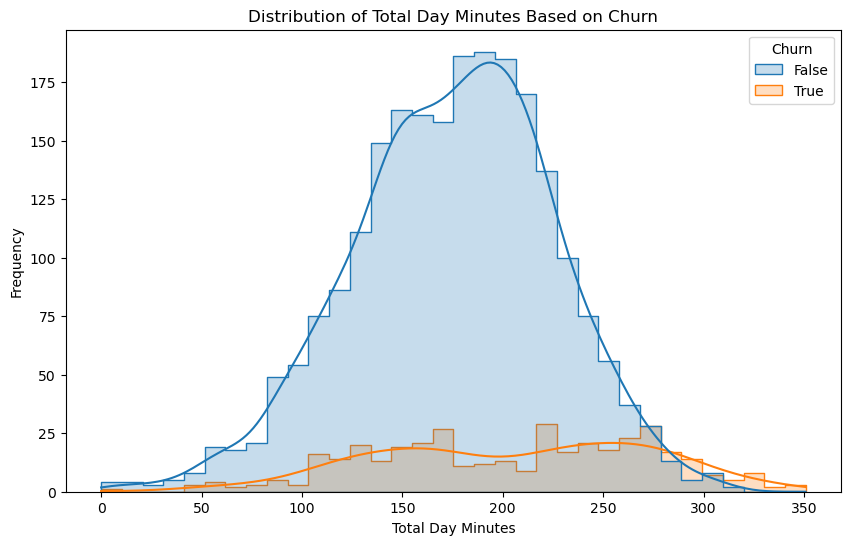

In [14]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Total day minutes', hue='Churn', kde=True, element='step')
plt.title('Distribution of Total Day Minutes Based on Churn')
plt.xlabel('Total Day Minutes')
plt.ylabel('Frequency')

plt.show()

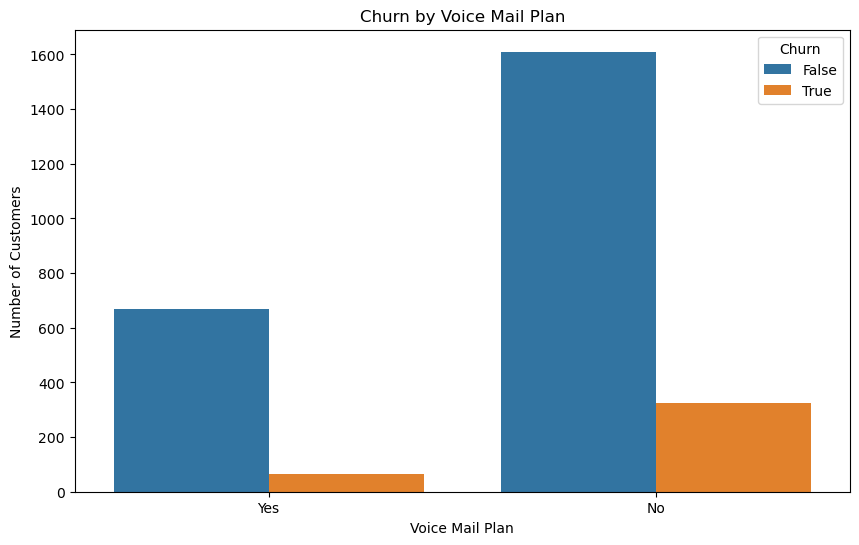

In [15]:
plt.figure(figsize=(10, 6))

sns.countplot(x='Voice mail plan', hue='Churn', data=df)
plt.title('Churn by Voice Mail Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Number of Customers')

plt.show()

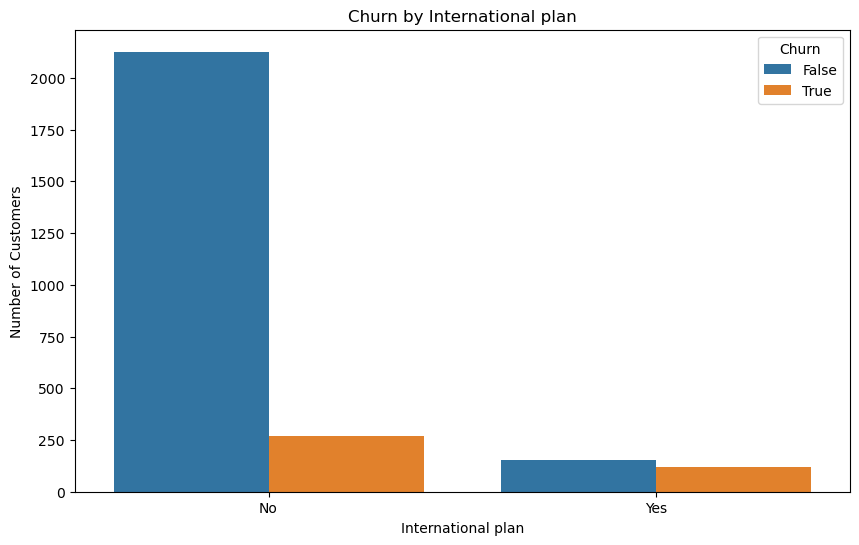

In [16]:
plt.figure(figsize=(10, 6))

sns.countplot(x='International plan', hue='Churn', data=df)
plt.title('Churn by International plan')
plt.xlabel('International plan')
plt.ylabel('Number of Customers')

plt.show()

In [17]:
x = df.iloc[:, 0:19].values
y = df.iloc[:, 19].values


int_plan_label_encode = LabelEncoder()
x[:, 3] = int_plan_label_encode.fit_transform(x[:, 3])

vm_plan_label_encode = LabelEncoder()
x[:, 4] = vm_plan_label_encode.fit_transform(x[:, 4])

labelencoder_y = LabelEncoder() 
y = labelencoder_y.fit_transform(y) 

Encoding State feature using One hot encoding

In [18]:
# Removing extra column to avoid dummy variable trap 
x_state = pd.get_dummies(x[:, 0], drop_first = True) 

# Converting X to a dataframe 
x = pd.DataFrame(x) 

# Dropping the 'State' column 
x = x.drop([0], axis = 1) 

# Merging two dataframes 
frames = [x_state, x] 
result = pd.concat(frames, axis = 1, ignore_index = True) 

# Final dataset with all numeric features 
x = result 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y,  
                                                    test_size = 0.2,
                                                    random_state = 0)

In [20]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

[LightGBM] [Info] Number of positive: 319, number of negative: 1813
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2509
[LightGBM] [Info] Number of data points in the train set: 2132, number of used features: 67
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.149625 -> initscore=-1.737547
[LightGBM] [Info] Start training from score -1.737547

Model Accuracies:
Logistic Regression: 0.8708
SVM: 0.8801
Decision Tree: 0.9082
Random Forest: 0.9419
Gradient Boosting: 0.9513
XGBoost: 0.9644
LightGBM: 0.9625
CatBoost: 0.9663

Best Model: CatBoost


<Figure size 800x600 with 0 Axes>

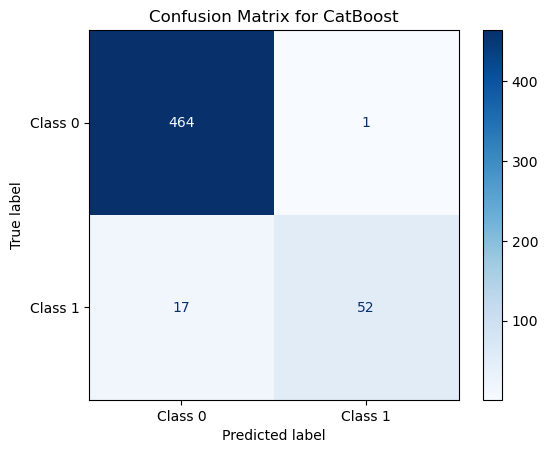

In [23]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'LightGBM': lgb.LGBMClassifier(),
    'CatBoost': CatBoostClassifier(silent=True)
}



best_model_name = None
best_model = None
best_accuracy = 0
results = {}


for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    
    if accuracy > best_accuracy:
        best_model_name = name
        best_model = model
        best_accuracy = accuracy
        
        
        
# Print results
print("\nModel Accuracies:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

# Display confusion matrix for the best model
print(f"\nBest Model: {best_model_name}")

y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()
        
    